# Basic Data Tools: Pandas

## Basics

The Pandas package introduces a very powerful data structure for working with labeled data in python: Dataframe. Each column represents a different type of data. The columns are named, so we will know what each entry in a column signifies. Each row represents a different entry in the dataset.

At its core, pandas builds on top of numpy, so it is a bit slower than writing optimal code in numpy, but it is more convenient and appropriate for most use-cases. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
companies = ['Jane Street', 'Citadel', 'Two Sigma', 'Goldman Sachs', 'Morgan Stanley']
Employees = [1200,1400,1600,40500,68000]
company_type = ['Proprietary Trading', 'Hedge Fund', 'Hedge Fund', 'Investment Bank', 'Investment Bank']

initial_comp_df = pd.DataFrame({'Company': companies, 'Industry Type': company_type, 'Number of Employees': Employees})
initial_comp_df

In [ ]:
initial_comp_df['Industry Type']

In [ ]:
# Index by company instead of integers
comp_df = pd.DataFrame({'Industry Type':company_type,'Number of Employees':Employees}, index = companies)
comp_df

In [ ]:
# Another way to create the same DataFrame
comp_df = pd.DataFrame(list(zip(company_type,Employees)),columns = ['Industry Type','Number of Employees'], index = companies)
comp_df

Dataframes have similarities to both dictionaries and numpy nd-arrays. We can retrive a column from a dataframe by using its name, just as we used to retrive an item from dictionary using its key


In [ ]:
comp_df['Number of Employees'] 

In [ ]:
# TODO: what does comp_df.shape give you?
comp_df.shape

Just like we saw retriving columns by using its name, rows can also be accessed using **loc** method:-

In [ ]:
comp_df.loc['Two Sigma'] #displaying the row Two Sigma
# QUESTION: how is this different from just Dataframe slicing?

In [ ]:
comp_df.loc['Two Sigma','Number of Employees'] #number of employees in two sigma retrived

In [ ]:
comp_df.loc['Two Sigma':'Morgan Stanley','Number of Employees'] #slicing a subsection

In [ ]:
comp_df.loc['Citadel':'Goldman Sachs','Industry Type'] #slicing a subsection

Adding a new row and column in dataframe is also quite simple and analogous to working with a dictionary. Similar is the case with dropping columns as well. Let us take a look at few examples:-

In [ ]:
comp_df['Attrition(in %)'] = [10,12,15,20,25] #an example of adding a column
comp_df

In [15]:
comp_df.loc['JP Morgan',:] = ['Investment Bank',100000,20] 
# QUESTION: what does this do?

In [ ]:
comp_df.drop('Attrition(in %)',axis = 1, inplace = True) #dropping a column
comp_df

In [ ]:
comp_df.sort_values(['Number of Employees'], ascending = False) #sorting a column

## Operations on DataFrames using Yahoo Finance Data 

We will use a custom package to get data from **yahoo finance** to get stock prices of a few companies and then will learn about some dataframe operations and applying functions to it 

In [7]:
import yfinance as yf

In [ ]:

# download dataframe
FAANG_data = yf.download("META AAPL GOOG MSFT AMZN NFLX NVDA", start="2023-08-30", end="2024-08-30")
#generally when we have a very large data, to get a feel for a data we generally display first few entries in dataframe

FAANG_data.head()

In [ ]:
FAANG_data = FAANG_data['Close'] #getting closing prices for each of the stock
FAANG_data.head()

In [ ]:
FAANG_data.plot(use_index='True') #plot of stock prices

### Filter, Plot and Apply

One of the important functionalities in Pandas in filtering dataframes. Often we want to work with a subset of data, based on some criteria. Let us take a look at few examples:-

In [ ]:
# TODO: print the shape of FAANG_data before and after filtering
print(FAANG_data.shape)
FAANG_data_filtered = FAANG_data[(FAANG_data['AMZN'] < 190) & (FAANG_data['GOOG'] < 250)]
print(FAANG_data_filtered.shape)


Normally in python, we use **and**, **or** while writing programs. However, when dealing with Series-style datatypes (Series and Dataframes), we will have to use bitwise operations which are as follows:-

and - & <br>
or - | <br>
not - ~ <br>

In [ ]:
# TODO: Use 'and' instead of '&' for the filtering condition and see what happens
FAANG_data_filtered = FAANG_data[(FAANG_data['AMZN'] < 190) and (FAANG_data['GOOG'] < 250)]


In [ ]:
FAANG_data_filtered.tail()

In [ ]:
comp_df[comp_df['Industry Type'].str.contains('Hedge')] #filtering with strings

We can apply numpy mathematical functions to dataframes as well, which we will take a look:-

In [ ]:
FAANG_data_log = np.log(FAANG_data) #applying log transformation to each of the values
FAANG_data_log.head()

In [ ]:
# TODO: Plot the log transformed data
FAANG_data_log.plot(use_index='True')

In [ ]:
a = 1
b = a
b = 3
print(a,b)

In [ ]:
FAANG_data_exp_NFLX = FAANG_data.copy()
FAANG_data_exp_NFLX['NFLX'] = np.log(FAANG_data_exp_NFLX['NFLX']) #applying transformation on a single column
# TODO: Display the head of this DataFrame
FAANG_data_exp_NFLX.head()

Often times, while doing data analysis...we would like to take a look at statistics of the numerical data such as its mean, median and if there are any null values in data. This is done by using describe function:-

In [ ]:
FAANG_data.describe()

In [ ]:
#renaming columns
FAANG_data.columns = ['Apple','Amazon','Google','Meta','Microsoft', 'Netflix','NVIDIA']
# TODO: Display the head of this DataFrame
FAANG_data.head()

In [31]:
FAANG_data>120 #how filtering works essentially

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA
Date,,,,,,,
2023-08-30 00:00:00+00:00,True,True,True,True,True,True,False
2023-08-31 00:00:00+00:00,True,True,True,True,True,True,False
2023-09-01 00:00:00+00:00,True,True,True,True,True,True,False
2023-09-05 00:00:00+00:00,True,True,True,True,True,True,False
2023-09-06 00:00:00+00:00,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...
2024-08-23 00:00:00+00:00,True,True,True,True,True,True,True
2024-08-26 00:00:00+00:00,True,True,True,True,True,True,True
2024-08-27 00:00:00+00:00,True,True,True,True,True,True,True


We can often use multiple filter operations followed by selections in a single command to performm our task, it becomes very convenient. Lets see an example:-

In [32]:
FAANG_data[FAANG_data.index<pd.to_datetime('2023-09-12', utc = True)][['Apple','Google']].tail()
# Question: Why are we setting utc = True?

,Apple,Google
Date,,
2023-09-05 00:00:00+00:00,189.699997,136.710007
2023-09-06 00:00:00+00:00,182.910004,135.369995
2023-09-07 00:00:00+00:00,177.559998,136.199997
2023-09-08 00:00:00+00:00,178.179993,137.199997
2023-09-11 00:00:00+00:00,179.360001,137.740005


We can use apply function to perform operations on rows. Its a pythonic way of doing it, instead of writing loops. Lets see a couple of examples:-

In [33]:
def high_price(x,y):
    if (x+y)//2>160:
        return 'Yes'
    else:
        return 'No'

In [34]:
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA
Date,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001


In [35]:
FAANG_data['High Stock Price'] = FAANG_data.apply(lambda x: high_price(x['Google'],x['Amazon']), axis = 1)
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price
Date,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No


In [36]:
FAANG_data[FAANG_data['High Stock Price'] == 'Yes'].head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price
Date,,,,,,,,
2024-02-09 00:00:00+00:00,188.850006,174.449997,150.220001,468.109985,420.549988,561.320007,72.133003,Yes
2024-03-14 00:00:00+00:00,173.000000,178.750000,144.339996,491.829987,425.220001,613.010010,87.944000,Yes
2024-03-18 00:00:00+00:00,173.720001,174.479996,148.479996,496.980011,417.320007,618.390015,88.455002,Yes
2024-03-19 00:00:00+00:00,176.080002,175.899994,147.919998,496.239990,421.410004,620.739990,89.398003,Yes
2024-03-20 00:00:00+00:00,178.669998,178.149994,149.679993,505.519989,425.230011,627.690002,90.372002,Yes


### Missing Data and GroupBy

In [37]:
#just an example
FAANG_data['Linkedin'] = np.random.choice([240,239,241,np.nan], size = len(FAANG_data))
FAANG_data['Lyft'] = np.random.choice([300,296,298,np.nan], size = len(FAANG_data))
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,NaN,296.0
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.0,298.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,241.0,296.0
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,241.0,296.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,239.0,300.0


In [38]:
#dropping null values
FAANG_data.dropna().head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.0,298.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,241.0,296.0
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,241.0,296.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,239.0,300.0
2023-09-08 00:00:00+00:00,178.179993,138.229996,137.199997,297.890015,334.269989,442.799988,45.571999,No,239.0,296.0


In [39]:
#imputing null values with mean and median
FAANG_data['Linkedin'] = FAANG_data['Linkedin'].fillna(value = FAANG_data['Linkedin'].mean())
FAANG_data['Lyft'] = FAANG_data['Lyft'].fillna(value = FAANG_data['Lyft'].median())
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft
Date,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,240.038462,296.0
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.000000,298.0
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,241.000000,296.0
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,241.000000,296.0
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,239.000000,300.0


Let us take a look at the **group by** operation. Groupby allows us to group together rows based off a column and perform an aggregate function on them( count, max, mean etc)

In [41]:
print(comp_df)
comp_df.groupby('Industry Type').mean() #average number of employees in each industry type

                      Industry Type  Number of Employees
Jane Street     Proprietary Trading                 1200
Citadel                  Hedge Fund                 1400
Two Sigma                Hedge Fund                 1600
Goldman Sachs       Investment Bank                40500
Morgan Stanley      Investment Bank                68000


,Number of Employees
Industry Type,
Hedge Fund,1500.0
Investment Bank,54250.0
Proprietary Trading,1200.0


In [42]:
comp_df.groupby('Industry Type').sum() #sum of employees in each industry type

,Number of Employees
Industry Type,
Hedge Fund,3000
Investment Bank,108500
Proprietary Trading,1200


In [43]:
comp_df['Industry Type'].value_counts() #This operation is really helpful to know if there are any duplicate entries or count of each entry

Industry Type
Hedge Fund             2
Investment Bank        2
Proprietary Trading    1
Name: count, dtype: int64

Now, let us apply the **groupby** operation on FAANG_data, which we downloaded from yahoo finance, to calculate average monthly return on stock price of FAANG companies.

In [44]:
FAANG_data['Avg FAANG Stock Price'] = FAANG_data.iloc[:,0:7].mean(axis = 1) #calculating avg stock price in a column

In [45]:
FAANG_data.head()

,Apple,Amazon,Google,Meta,Microsoft,Netflix,NVIDIA,High Stock Price,Linkedin,Lyft,Avg FAANG Stock Price
Date,,,,,,,,,,,
2023-08-30 00:00:00+00:00,187.649994,135.070007,136.929993,295.100006,328.790009,434.670013,49.264000,No,240.038462,296.0,223.924860
2023-08-31 00:00:00+00:00,187.869995,138.009995,137.350006,295.890015,327.760010,433.679993,49.355000,No,239.000000,298.0,224.273573
2023-09-01 00:00:00+00:00,189.460007,138.119995,136.800003,296.380005,328.660004,439.880005,48.508999,No,241.000000,296.0,225.401288
2023-09-05 00:00:00+00:00,189.699997,137.270004,136.710007,300.149994,333.549988,448.679993,48.548000,No,241.000000,296.0,227.801140
2023-09-06 00:00:00+00:00,182.910004,135.360001,135.369995,299.170013,332.880005,445.760010,47.061001,No,239.000000,300.0,225.501575


In [46]:
Avg_FAANG_stockprice_data = FAANG_data[['Avg FAANG Stock Price']] #selecting columns in dataframe
Avg_FAANG_stockprice_data.reset_index(inplace = True) #resetting index so that we can calculate monthly returns
Avg_FAANG_stockprice_data['Mdate'] = Avg_FAANG_stockprice_data['Date'].dt.to_period('M')
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate
0,2023-08-30 00:00:00+00:00,223.924860,2023-08
1,2023-08-31 00:00:00+00:00,224.273573,2023-08
2,2023-09-01 00:00:00+00:00,225.401288,2023-09
3,2023-09-05 00:00:00+00:00,227.801140,2023-09
4,2023-09-06 00:00:00+00:00,225.501575,2023-09


## Finance Examples

### Monthly Returns

Let us understand how to calculate monthly returns from daily returns of a stock, as it will help us later

Let $P_{0}$ be the initial stock price, and after a month the stock price becomes $P_{1}$, and $r_{0}$ be the monthly percentage return:-

\begin{equation}
P_{1} = P_{0}(1+r_{0})
\end{equation}

Let $r_1$, $r_2$, $\ldots$, $r_{30}$ be the the daily returns of the stock in a month. Then we can write:-
    
\begin{equation}
P_{1} = P_{0}(1+r_{1})(1+r_{2})\ldots(1+r_{30})
\end{equation}

From both the above equations we can say that:-
    
$1+r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30})$ <br>
$r_{0} = (1+r_{1})(1+r_{2})\ldots(1+r_{30}) - 1$

Therefore, to calculate monthly return we will calculate daily return first:-



In [47]:
Avg_FAANG_stockprice_data['daily_return'] = Avg_FAANG_stockprice_data['Avg FAANG Stock Price'].pct_change()
Avg_FAANG_stockprice_data['daily_return_adjusted'] = 1 + Avg_FAANG_stockprice_data['daily_return']
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted
0,2023-08-30 00:00:00+00:00,223.924860,2023-08,NaN,NaN
1,2023-08-31 00:00:00+00:00,224.273573,2023-08,0.001557,1.001557
2,2023-09-01 00:00:00+00:00,225.401288,2023-09,0.005028,1.005028
3,2023-09-05 00:00:00+00:00,227.801140,2023-09,0.010647,1.010647
4,2023-09-06 00:00:00+00:00,225.501575,2023-09,-0.010095,0.989905


Now we have to calculate monthly returns. It is evident that we will have to **groupby** using monthly date:-

In [76]:
# TODO: Use the formula above to add a column for monthly returns using daily_return_adjusted
Avg_FAANG_stockprice_data[['Mdate', 'daily_return_adjusted']].groupby('Mdate').prod()['daily_return_adjusted'] - 1
Avg_FAANG_stockprice_data.groupby('Mdate')['daily_return_adjusted'].apply(np.prod) - 1


Mdate
2023-08    0.001557
2023-09   -0.065402
2023-10    0.036648
2023-11    0.115548
2023-12    0.032439
2024-01    0.081605
2024-02    0.099398
2024-03    0.012008
2024-04   -0.067166
2024-05    0.106458
2024-06    0.074001
2024-07   -0.049690
2024-08    0.038707
Freq: M, Name: daily_return_adjusted, dtype: float64

In [77]:
Avg_FAANG_stockprice_data['monthly_return'] = Avg_FAANG_stockprice_data.groupby('Mdate')['daily_return_adjusted'].transform(np.prod) - 1


In [78]:
Avg_FAANG_stockprice_data.head()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted,monthly_return
0,2023-08-30 00:00:00+00:00,223.924860,2023-08,NaN,NaN,0.001557
1,2023-08-31 00:00:00+00:00,224.273573,2023-08,0.001557,1.001557,0.001557
2,2023-09-01 00:00:00+00:00,225.401288,2023-09,0.005028,1.005028,-0.065402
3,2023-09-05 00:00:00+00:00,227.801140,2023-09,0.010647,1.010647,-0.065402
4,2023-09-06 00:00:00+00:00,225.501575,2023-09,-0.010095,0.989905,-0.065402


In [80]:
Avg_FAANG_stockprice_data['rolling_return'] = Avg_FAANG_stockprice_data['daily_return_adjusted'].rolling(30).apply(np.prod) - 1

In [82]:
Avg_FAANG_stockprice_data.tail()

,Date,Avg FAANG Stock Price,Mdate,daily_return,daily_return_adjusted,monthly_return,rolling_return
247,2024-08-23 00:00:00+00:00,333.171424,2024-08,0.002523,1.002523,0.038707,-0.003789
248,2024-08-26 00:00:00+00:00,331.445710,2024-08,-0.005180,0.994820,0.038707,-0.012849
249,2024-08-27 00:00:00+00:00,332.069992,2024-08,0.001884,1.001884,0.038707,-0.004642
250,2024-08-28 00:00:00+00:00,328.374296,2024-08,-0.011129,0.988871,0.038707,0.012434
251,2024-08-29 00:00:00+00:00,329.531418,2024-08,0.003524,1.003524,0.038707,0.017297


In [83]:
Avg_FAANG_stockprice_data[['Mdate','monthly_return']].drop_duplicates().head() #dropping duplicates to see returns for each monthy

,Mdate,monthly_return
0,2023-08,0.001557
2,2023-09,-0.065402
22,2023-10,0.036648
44,2023-11,0.115548
65,2023-12,0.032439


### The rolling() method and the MACD Trading Strategy

In [84]:
import matplotlib.pyplot as plt
# %matplotlib notebook

Let us take a look at Apple stock price data:-

In [85]:
Apple_data = FAANG_data[['Apple']]
Apple_data.head()

,Apple
Date,
2023-08-30 00:00:00+00:00,187.649994
2023-08-31 00:00:00+00:00,187.869995
2023-09-01 00:00:00+00:00,189.460007
2023-09-05 00:00:00+00:00,189.699997
2023-09-06 00:00:00+00:00,182.910004


 **Rolling** function provides the feature of rolling window calculations. We take a window of a desired size, and perform some mathematical operations on it. A common example is moving average which is often used in trading and time series forecasting

In [86]:
Apple_data.rolling(3).mean()

,Apple
Date,
2023-08-30 00:00:00+00:00,NaN
2023-08-31 00:00:00+00:00,NaN
2023-09-01 00:00:00+00:00,188.326665
2023-09-05 00:00:00+00:00,189.010000
2023-09-06 00:00:00+00:00,187.356669
...,...
2024-08-23 00:00:00+00:00,225.923330
2024-08-26 00:00:00+00:00,226.183329
2024-08-27 00:00:00+00:00,227.349996


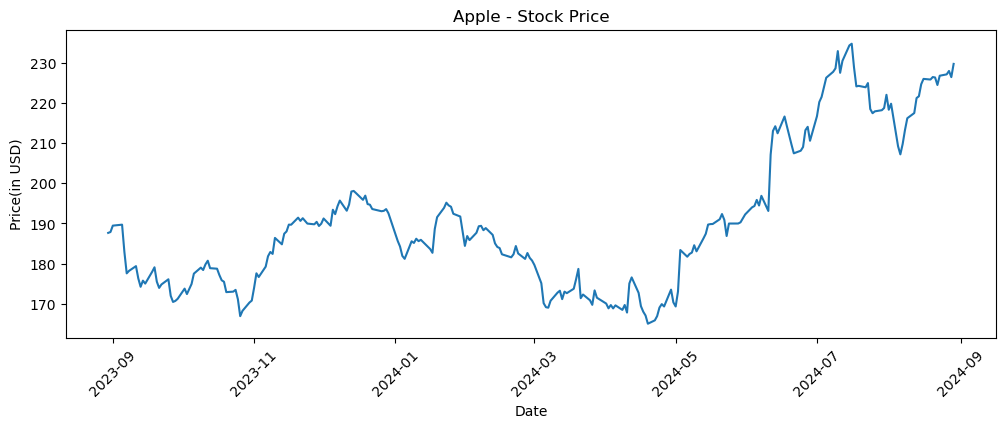

In [87]:
plt.figure(figsize = (12,4))
plt.plot(Apple_data)
plt.xticks(rotation = 45)
plt.title('Apple - Stock Price')
plt.xlabel('Date')
plt.ylabel('Price(in USD)')
plt.show()

**MACD** stands for Moving Average convergence/Divergence. It is a momentum indicator, that is it tells the general direction of stock in short to medium term.

A few principles of MACD trading strategy:-

We will calculate some exponential moving averages with window size 12 and 26. 

MACD line gives us the short to medium term trend of the price action(whether stock is going up, down, sideways)

Signal line is 9 month exponential moving average of MACD line, so its just smoothened version of MACD line. 

In [88]:
#Calculate short term exponential moving average
ShortEMA = Apple_data.ewm(span = 12, adjust = False).mean()

#Calculate long term exponential moving average
LongEMA = Apple_data.ewm(span = 26, adjust = False).mean()

#MACD line
# TODO: Define a new column in Apple_data called 'MACD' which is the difference between ShortEMA and LongEMA
Apple_data['MACD'] = ShortEMA - LongEMA

#Signal Line
# TODO: Define a new column in Apple_data called 'Signal' which is the exponential moving average of MACD with a span of 9
Apple_data['Signal'] = Apple_data['MACD'].ewm(span = 9, adjust = False).mean()

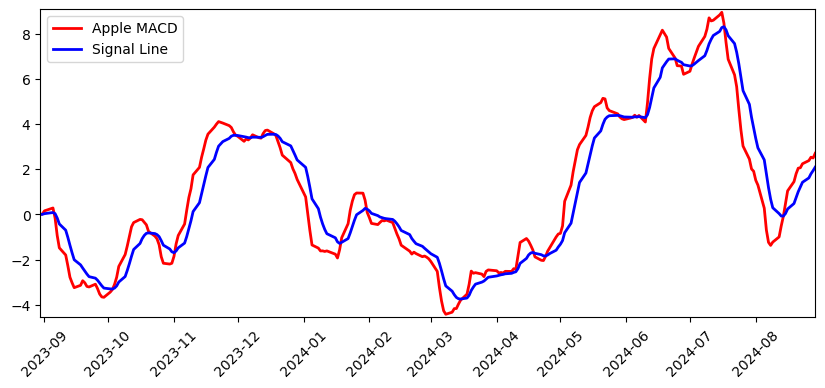

In [92]:
plt.figure(figsize = (10,4))
plt.plot(Apple_data.index,Apple_data['MACD'],label = 'Apple MACD',color = 'red', linewidth = 2)
plt.plot(Apple_data.index,Apple_data['Signal'],label = 'Signal Line', color = 'blue', linewidth = 2)
plt.xticks(rotation = 45)
plt.legend()
plt.margins(x=0, y=0.01)
plt.show()

**MACD** trading strategy can be used as a buy or sell signal:-

**Buy** when **MACD line** crosses above the **Signal Line** <br>
**Sell** when **MACD line** crosses below the **Signal Line**


**Pandas is the bread and butter of data analysis when it comes to tabular data. Play with it functionalities on your own to get a hang of it. We will be using operations like filter, null value imputation a lot in data cleaning**
